## 1. Train Data와 Test data 각각의 개념과 분리하는 이유를 설명하시오.

답 : train데이터는 모델의 학습을 위한 데이터이고 test데이터는 모델이 학습한 데이터의 성능을 최종적으로 판단하기 위해 사용하는 데이터이다. 전체 데이터세트로 학습을 하고 테스트를 하면 당연히 accuracy와 같은 평가지표가 높게 나오기 때문에 이렇게 분리해야 성능을 제대로 평가할 수 있다.

## 2. 데이터 구조 파악하기
#### (1) 사이킷런에서 `load_breast_cancer`, `의사결정트리`, `학습과 테스트 데이터를 분류하는 모듈`을 import 하세요.

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#### (2) load_breast_cancer 데이터를 `breast_cancer`로 로딩 후 key 값들을 `keys`에 저장해 출력하세요.

In [3]:
breast_cancer = load_breast_cancer()
keys = breast_cancer.keys()
keys

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

#### (3) `feature_names`와 `target_names`를 출력하세요. 
***(shape과 type도 함께 출력하세요.)***

In [4]:
print(breast_cancer.feature_names)
print(type(breast_cancer.feature_names))
print(breast_cancer.feature_names.shape)

print('\n',breast_cancer.target_names)
print(type(breast_cancer.target_names))
print(breast_cancer.target_names.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
<class 'numpy.ndarray'>
(30,)

 ['malignant' 'benign']
<class 'numpy.ndarray'>
(2,)


## 3. 데이터 분리 & 예측

### (1) 학습/테스트 데이터 분리
**breast_cancer_data를 `test data`와 ` train data`로 분리해보세요.**

*(단, train data와 test data의 비율은 8:2, random_state는 자신의 나이로 설정)*

In [5]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=26)

### (2) 의사결정트리
#### 의사결정트리 객체를 만들고 `학습`과 `예측`을 수행하세요.
*(단, random_state는 자신의 나이로 설정)*

In [6]:
dt_clf = DecisionTreeClassifier(random_state=26)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

### (3) 예측 정확도 출력
- **`accuracy_score`**을 측정하는 **module**을 **import**하세요.
- 예측 정확도를 **`소수 여섯째 자리`**까지 출력하세요.

In [7]:
from sklearn.metrics import accuracy_score
import numpy as np

np.round(accuracy_score(pred,y_test),6)

0.921053

## 4. 교차검증
### 1) 데이터 전처리 및 분포 시각화
*creditcard.csv는 카드 거래 데이터를 담고 있습니다.* 

*Class가 0으로 분류되어있는 데이터는 정상적인 카드 거래 데이터이고, 1로 분류된 데이터는 이상 거래로 분류된 데이터입니다.*


 - `creditcard.csv` 파일을 활용합니다.
 - `card`의 **'Time'열과 'Amount'**열은 삭제해주세요 
 -  `MinMaxScaler()`를 통해 정규화를 진행한 후, `df`로 저장해주세요
 - `class`의 분포를 `seaborn`라이브러리의 `countplot`으로 시각화하여 데이터의 분포를 확인해주세요  
 
 **주의 :  `card` DataFrame에 `MinMaxScaler()`를 적용하는 경우 `Class`도 같이 정규화되어버림에 유의해주세요 !**

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

np.random.seed(777)
card = pd.read_csv('creditcard.csv')

In [9]:
card.drop(['Time','Amount'], axis=1, inplace=True)

In [10]:
card.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [11]:
card['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
X_features = card.iloc[:,:-1]
y_target = card.iloc[:,-1]

scaler = MinMaxScaler()
df = scaler.fit_transform(X_features)

In [13]:
scaled_card = pd.DataFrame(df, columns = X_features.columns)
scaled_card.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490


In [14]:
scaled_card['Class'] = y_target
scaled_card.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0


<AxesSubplot:xlabel='Class', ylabel='count'>

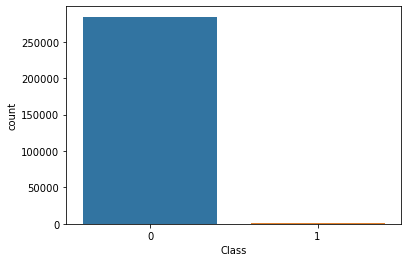

In [15]:
sns.countplot(scaled_card['Class'])

### 2) 교차검증 수행

 - **데이터 분포의 특징**을 파악한 뒤, 적절한 방식으로 교차검증을 진행해주세요. **K = 5**로 두고 진행해주시면 됩니다.

 - 폴드 수 별로 (1) 교차검증 정확도, (2) 학습 데이터의 크기, (3) 검증 데이터의 크기를 출력하고
 - (4) 평균 검증 정확도를 출력해주세요
 - `cross_val_score()`는 3)번에서 사용해볼 것이니 여기서는 쓰지마세요!
 
HINT ① : `Class`열은 `df` 데이터프레임의 맨 마지막 열에 위치하며, `Class`열만 label로 활용하여야 합니다.

HINT ② : `iloc()` 을 활용하여 데이터프레임을 분리해보세요.

In [16]:
from sklearn import linear_model
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score

#Build the model
logistic = linear_model.LogisticRegression(C=1e5)

In [25]:
X_features.values

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
        -1.89114844e-01,  1.33558377e-01, -2.10530535e-02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
         1.25894532e-01, -8.98309914e-03,  1.47241692e-02],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -1.39096572e-01, -5.53527940e-02, -5.97518406e-02],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
        -8.73705959e-02,  4.45477214e-03, -2.65608286e-02],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         5.46668462e-01,  1.08820735e-01,  1.04532821e-01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -8.18267121e-01, -2.41530880e-03,  1.36489143e-02]])

In [26]:
y_target.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
skfold = StratifiedKFold(n_splits=5)
n_iter = 0
cv_accuracy=[]

for train_index, test_index in skfold.split(X_features.values, y_target):
    X_train, X_test = X_features.values[train_index], X_features.values[test_index]
    y_train, y_test = y_target[train_index], y_target[test_index]
    
    logistic.fit(X_train, y_train)
    pred = logistic.predict(X_test)
    n_iter +=1
    
    accuracy = accuracy_score(y_test,pred)
    
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    cv_accuracy.append(accuracy)
    
    print('{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter,accuracy,train_size,test_size))
    
print('\n 평균 검증 정확도: ', np.mean(cv_accuracy))

1 교차 검증 정확도: 0.9989817773252344, 학습 데이터 크기: 227845, 검증 데이터 크기: 56962
2 교차 검증 정확도: 0.9993328885923949, 학습 데이터 크기: 227845, 검증 데이터 크기: 56962
3 교차 검증 정확도: 0.9989466477063254, 학습 데이터 크기: 227846, 검증 데이터 크기: 56961
4 교차 검증 정확도: 0.999280209265989, 학습 데이터 크기: 227846, 검증 데이터 크기: 56961
5 교차 검증 정확도: 0.9990344270641316, 학습 데이터 크기: 227846, 검증 데이터 크기: 56961

 평균 검증 정확도:  0.9991151899908151


### 3) cross_val_score() API 이용
- `cross_val_score()`를 이용하여 2)에서 진행한 교차검증을 진행해주세요!
- 마찬가지로 **K=5**로 지정해주시면 됩니다

#### (1) 먼저 `df_x`에 `Class`이외의 모든 열을 , `df_y`에 `Class`열을 저장해주세요

In [102]:
# 위에서 미리 지정했었습니다.
df_x = X_features
df_y = y_target

#### (2) `cross_val_score()`를 통해 교차검증을 진행해주세요
- 교차 검증 별 정확도와, 평균 검증 정확도를 출력해주세요
- **scoring = 'accuracy'**로 지정하시면 됩니다

In [103]:
# 학습데이터/테스트데이터 단순 분할 방법
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logistic, df_x, df_y, scoring='accuracy', cv=5)
print('교차 검증별 정확도:',scores)
print('평균 검증 정확도:',np.mean(scores))

교차 검증별 정확도: [0.99898178 0.99933289 0.99894665 0.99928021 0.99903443]
평균 검증 정확도: 0.9991151899908151


In [107]:
# 학습데이터/테스트데이터로 나눈 후, 학습데이터만으로 교차검증
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)
scores = cross_val_score(logistic, X_train, y_train, scoring='accuracy', cv=5)
print('교차 검증별 정확도:',scores)
print('평균 검증 정확도:',np.mean(scores))

교차 검증별 정확도: [0.99910027 0.99920999 0.99918804 0.99927582 0.99907832]
평균 검증 정확도: 0.9991704887094297


## 5. GridSearchCV() & RandomizedSearchCV()
### 1) 데이터 전처리

 - `cardio_train.csv` 파일을 활용합니다. 
 -  `X`에는 **cardio**열을 제외한 모든 데이터를, `y`에는 **cardio**열만 저장해주세요.
 - **training dataset**과 **test dataset**은 `train_test_split`을 이용하여, **test_size = 0.25**가 되도록 분할해주세요.

**category_encoders 모듈이 설치되지 않은 분은 먼저 깔고 진행해주세요.**

`pip install category_encoders`

In [42]:
import pandas as pd
from scipy.stats import randint, uniform
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

#데이터 불러오기
df= pd.read_csv('cardio_train.csv',sep=';')
df.head()

#pipeline 알고리즘 사용
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=2)
)

#hyper-parameter를 딕셔너리 형태로
dists = {
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'], 
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1)
}

In [44]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [45]:
X = df.drop('cardio', axis=1)
y = df['cardio']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 )

### 2) RamdomizedSearchCV() 이용

#### (1) RamdomizedSearchCV()를 이용해 알고리즘의 최적 파라미터 조합을 찾으세요.

 - `estimator`는 pipe, `param_distributions`는  dists 입니다.
 - 이때, 총 5번 반복해서 수행하며 `cv`는 3입니다.
 - `scoring`은 'accuracy, `verbose`는 1, `n_jobs`는 -1로 설정해주세요.
 
 **주의 :  모델이 수행되는데 조금의 시간이 소요될 수 있습니다! **

In [72]:
rs = RandomizedSearchCV(pipe,
                        param_distributions = dists,
                        n_iter=5,
                        cv=3,
                        scoring='accuracy',
                        verbose=1,
                        n_jobs=-1)

rs

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('simpleimputer', SimpleImputer()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=2))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': [5,
                                                                              10,
                                                                              15,
                                                                              20,
                                                                              None],
                                        'randomforestclassifier__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FD040D310

In [79]:
rs.fit(X_train, y_train) # ??

UnicodeEncodeError: 'ascii' codec can't encode characters in position 18-20: ordinal not in range(128)

#### (2) RamdomizedSearchCV()를 통해 학습한 estimator를 이용하여 train/test dataset에 대해 성능을 평가하세요.

 - 먼저, 위에서 찾은 최적 하이퍼파라미터를 적용한 모델을 생성해주세요.
 - 최적 모델에 train/test dats를 넣고 score를 추출해주세요. (각각 f1_score만 출력해주세요.)
 

### 3) GridSearchCV() 이용

#### (1) GridSearchCV()를 이용해 알고리즘의 최적 파라미터 조합을 찾으세요.

 - `cv`는 3, `refit`는  True로 지정해주시면 됩니다.
 - 모델 수행 전에 dists 재설정 해주셔야합니다!
 - 결과를 `scores_df`에 저장하고, `scores_df`의 `'params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score'`열을 출력해주세요
          
          
 **주의 :  모델이 수행되는데 조금의 시간이 소요될 수 있습니다! **

In [80]:
dists = {
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'], 
    'randomforestclassifier__max_depth': [5, 10]
}

In [86]:
gs = GridSearchCV(pipe,
                 cv=3,
                 param_grid=dists,
                 refit=True # 디폴트가 True)

In [87]:
gs.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=2))]),
             param_grid={'randomforestclassifier__max_depth': [5, 10],
                         'simpleimputer__strategy': ['mean', 'median',
                                                     'most_frequent']})

In [91]:
scores_df = pd.DataFrame(gs.cv_results_)
scores_df = scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]
scores_df

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'randomforestclassifier__max_depth': 5, 'simp...",0.999214,4,0.999236,0.999026,0.999381
1,"{'randomforestclassifier__max_depth': 5, 'simp...",0.999214,4,0.999236,0.999026,0.999381
2,"{'randomforestclassifier__max_depth': 5, 'simp...",0.999214,4,0.999236,0.999026,0.999381
3,"{'randomforestclassifier__max_depth': 10, 'sim...",0.999263,1,0.999236,0.999210,0.999342
4,"{'randomforestclassifier__max_depth': 10, 'sim...",0.999263,1,0.999236,0.999210,0.999342
5,"{'randomforestclassifier__max_depth': 10, 'sim...",0.999263,1,0.999236,0.999210,0.999342


#### (2) GridSearchCV()의 최적 파라미터와 최고 정확도를 출력해주세요.

In [92]:
print('최적 파라미터:', gs.best_params_)
print('최고 정확도:{0:.4f}'.format(gs.best_score_))

최적 파라미터: {'randomforestclassifier__max_depth': 10, 'simpleimputer__strategy': 'mean'}
최고 정확도:0.9993


#### (3) GridSearchCV()를 통해 학습한 estimator를 이용하여 test dataset의 정확도를 찾으세요.

 - 먼저, 위에서 찾은 최적 하이퍼파라미터를 적용한 모델을 생성해주세요.
 - 최적 모델의 테스트 데이터 세트 정확도를 출력해주세요.

In [94]:
best_estimator = gs.best_estimator_

pred = best_estimator.predict(X_test)
print('테스트 데이터 세트 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도:0.9995
